# Tree Guild Mapping Notebook

This notebook helps map existing trees in village social spaces, visualize their locations, and identify the next trees or plants to add. You can:

1. **Ingest** local data of tree locations, possibly collected by volunteers.
2. **Visualize** those locations on a simple coordinate plot (or on a map using a library like [folium](https://python-visualization.github.io/folium/)).
3. **Propose** suitable companion plants for building robust Tree Guilds.

In [1]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# If you'd like a more sophisticated map visualization, you can install and import folium:
# !pip install folium
# import folium

%matplotlib inline

## 1. Ingest or Simulate Tree Location Data
In a real scenario, you'd gather data from:
- A volunteer survey (GPS coordinates or addresses)
- Existing local government or community records
- Simple lat/long data collected from smartphones

Below, we simulate data for demonstration.

In [2]:
# Simulated dataset of existing trees in the village
# We'll create random lat/long coordinates near a hypothetical location.

num_trees = 8  # Suppose we've mapped 8 existing trees

np.random.seed(42)

# Let's choose a hypothetical central point (latitude, longitude)
village_center_lat = 25.1234
village_center_lng = 75.1234

# We'll spread the trees within ~0.01 degrees lat/lng around this center
random_lats = village_center_lat + np.random.uniform(-0.01, 0.01, size=num_trees)
random_lngs = village_center_lng + np.random.uniform(-0.01, 0.01, size=num_trees)

# Simulate known species for these trees
species_list = [
    "Neem", "Peepal", "Banyan", "Mango", "Neem", "Lemon", "Guava", "Peepal"
]

data = {
    "Tree_ID": range(1, num_trees+1),
    "Species": species_list,
    "Latitude": random_lats,
    "Longitude": random_lngs
}

df_trees = pd.DataFrame(data)
df_trees

,Tree_ID,Species,Latitude,Longitude
0,1,Neem,25.120891,75.125422
1,2,Peepal,25.132414,75.127561
2,3,Banyan,25.128040,75.113812
3,4,Mango,25.125373,75.132798
4,5,Neem,25.116520,75.130049
5,6,Lemon,25.116520,75.117647
6,7,Guava,25.114562,75.117036
7,8,Peepal,25.130724,75.117068


## 2. Visualize Existing Trees
Here, we do a simple 2D scatter plot of latitude vs. longitude.

For a more interactive map, you could use [folium](https://python-visualization.github.io/folium/) or another GIS tool.

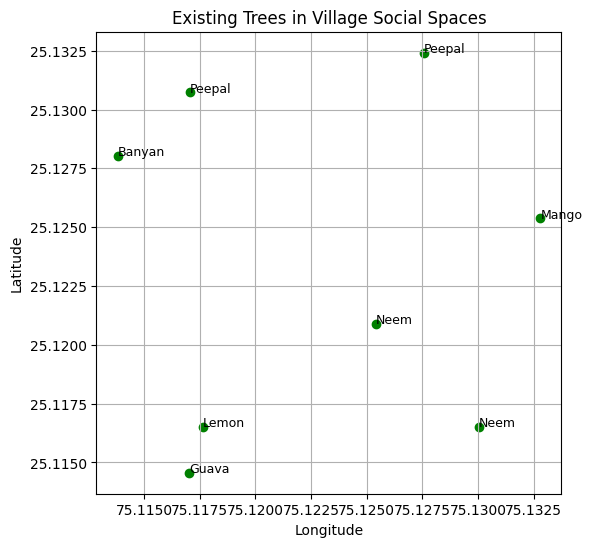

In [3]:
# Simple scatter plot of lat/long
plt.figure(figsize=(6,6))
plt.scatter(df_trees["Longitude"], df_trees["Latitude"], c='green', marker='o')

for i, row in df_trees.iterrows():
    plt.text(row["Longitude"], row["Latitude"], row["Species"], fontsize=9, ha='left')

plt.title("Existing Trees in Village Social Spaces")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
import folium
m = folium.Map(location=[village_center_lat, village_center_lng], zoom_start=14)
for i, row in df_trees.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Species']} (ID: {row['Tree_ID']})"
    ).add_to(m)
m


## 3. Identify Companion Plants or Trees for Guilds

We can define a simple set of companion planting guidelines. For example:
- **Neem** companions: (e.g., Lemongrass, Basil, or fruit trees that benefit from pest control)
- **Peepal** companions: (e.g., water-intensive smaller shrubs, flowers that attract pollinators)
- **Banyan** companions: (often spaced well with other native fruit trees, e.g., Mango, Jamun)
- **Mango** companions: (nitrogen-fixing plants, pollinator-attracting flowers)

Below is a simple rule-based approach as a starting point. You can replace or expand with detailed ecological data.

In [ ]:
# Example companion rules (very simplified, for demonstration).
companion_dict = {
    "Neem": ["Lemongrass", "Tulsi (Holy Basil)", "Banana", "Papaya"],
    "Peepal": ["Pollinator Flowers", "Hibiscus", "Native Herbs"],
    "Banyan": ["Mango", "Jamun", "Tamarind"],
    "Mango": ["Pigeon Pea", "Moringa", "Marigold"],
    "Guava": ["Lemon", "Mint", "Ginger", "Marigold"],
    "Lemon": ["Basil", "Rosemary", "Native Wildflowers"],
    # Add or modify as needed for other species...
}

def recommend_companions(species):
    """Return a list of recommended companion plants for a given species."""
    return companion_dict.get(species, ["General Native Shrubs", "Pollinator-Friendly Herbs"])

# Let's make a new DataFrame that includes recommended companions.
recommendations = []

for i, row in df_trees.iterrows():
    species = row["Species"]
    rec_plants = recommend_companions(species)
    recommendations.append(", ".join(rec_plants))

df_trees["Recommended Companions"] = recommendations
df_trees

## 4. Output & Next Steps

You can save the table of existing trees and recommendations as a CSV or Excel file for your local volunteers. This helps them know what to plant next to each existing tree to form a full Tree Guild.

In [ ]:
# Export the table for reference
df_trees.to_csv("tree_recommendations.csv", index=False)
print("Data saved to tree_recommendations.csv.")

### Summary

1. **Map Existing Trees**: We collected or simulated lat/long data for each tree.
2. **Visualize**: Used a simple scatter plot (or Folium) to see tree distribution.
3. **Identify Companions**: Proposed a rule-based system to recommend plants for building a Tree Guild.

#### Next Steps
- **Incorporate real data**: Replace simulation with actual volunteer/GPS data.
- **Expand recommendations**: Refine ecological relationships, pollinator-friendly plants, pest repellants.
- **Track Growth**: Later, integrate camera or drone imagery, measure tree health indices over time.
- **Community Involvement**: Provide local volunteers with the CSV or a simple app, so they know exactly what to plant.